## Project: Evaluation of Student Performance

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href='#split'>Split Data</a></li>
<li><a href='#model'>Train Model</a></li>
<li><a href="#con">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

>This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features) and it was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in two distinct subjects: Mathematics (mat) and Portuguese language (por). In [Cortez and Silva, 2008], the two datasets were modeled under binary/five-level classification and regression tasks. Important note: the target attribute G3 has a strong correlation with attributes G2 and G1. This occurs because G3 is the final year grade (issued at the 3rd period), while G1 and G2 correspond to the 1st and 2nd period grades. It is more difficult to predict G3 without G2 and G1, but such prediction is much more useful (see paper source for more details).

### Columns Description

#### Attributes for both student-mat.csv (Math course) and student-por.csv (Portuguese language course) datasets:
1 school - student's school (binary: "GP" - Gabriel Pereira or "MS" - Mousinho da Silveira)
<br>
2 sex - student's sex (binary: "F" - female or "M" - male)
<br>
3 age - student's age (numeric: from 15 to 22)
<br>
4 address - student's home address type (binary: "U" - urban or "R" - rural)
<br>
5 famsize - family size (binary: "LE3" - less or equal to 3 or "GT3" - greater than 3)
<br>
6 Pstatus - parent's cohabitation status (binary: "T" - living together or "A" - apart)
<br>
7 Medu - mother's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
<br>
8 Fedu - father's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
<br>
9 Mjob - mother's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")
<br>
10 Fjob - father's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")
<br>
11 reason - reason to choose this school (nominal: close to "home", school "reputation", "course" preference or "other")
<br>
12 guardian - student's guardian (nominal: "mother", "father" or "other")
<br>
13 traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
<br>
14 studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
<br>
15 failures - number of past class failures (numeric: n if 1<=n<3, else 4)
<br>
16 schoolsup - extra educational support (binary: yes or no)
<br>
17 famsup - family educational support (binary: yes or no)
<br>
18 paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
<br>
19 activities - extra-curricular activities (binary: yes or no)
<br>
20 nursery - attended nursery school (binary: yes or no)
<br>
21 higher - wants to take higher education (binary: yes or no)
<br>
22 internet - Internet access at home (binary: yes or no)
<br>
23 romantic - with a romantic relationship (binary: yes or no)
<br>
24 famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
<br>
25 freetime - free time after school (numeric: from 1 - very low to 5 - very high)
<br>
26 goout - going out with friends (numeric: from 1 - very low to 5 - very high)
<br>
27 Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
<br>
28 Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
<br>
29 health - current health status (numeric: from 1 - very bad to 5 - very good)
<br>
30 absences - number of school absences (numeric: from 0 to 93)

#### these grades are related with the course subject, Math or Portuguese:
31 G1 - first period grade (numeric: from 0 to 20)
<br>
31 G2 - second period grade (numeric: from 0 to 20)
<br>
32 G3 - final grade (numeric: from 0 to 20, output target)

Additional note: there are several (382) students that belong to both datasets . 
These students can be identified by searching for identical attributes
that characterize each student, as shown in the annexed R file.

<a id='wrangling'></a>
## Data Wrangling

#### Libraries used

In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

#### Read data from csv file Math, Por

In [492]:
stud_mat=pd.read_csv("student-mat.csv",sep=';')
stud_por=pd.read_csv("student-por.csv",sep=';')

#### Show dataset  

In [6]:
stud_mat.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [13]:
stud_mat.shape

(395, 33)

In [7]:
stud_por.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [14]:
stud_por.shape

(649, 33)

#### Check if columns of both files are matched 

In [11]:
print(f"Are all columns of both files matched :{all(stud_mat.columns==stud_por.columns)}") 

Are all columns of both files matched :True


#### Combine the separate data files for the Mathematics and Portuguese language subjects

In [493]:
All_df=pd.concat([stud_mat,stud_por],ignore_index=True)
All_df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
1040,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
1041,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
1042,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


#### Check null values

In [24]:
All_df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

#### Info about data

In [25]:
All_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      1044 non-null   object
 1   sex         1044 non-null   object
 2   age         1044 non-null   int64 
 3   address     1044 non-null   object
 4   famsize     1044 non-null   object
 5   Pstatus     1044 non-null   object
 6   Medu        1044 non-null   int64 
 7   Fedu        1044 non-null   int64 
 8   Mjob        1044 non-null   object
 9   Fjob        1044 non-null   object
 10  reason      1044 non-null   object
 11  guardian    1044 non-null   object
 12  traveltime  1044 non-null   int64 
 13  studytime   1044 non-null   int64 
 14  failures    1044 non-null   int64 
 15  schoolsup   1044 non-null   object
 16  famsup      1044 non-null   object
 17  paid        1044 non-null   object
 18  activities  1044 non-null   object
 19  nursery     1044 non-null   object
 20  higher  

#### Correlation between All columns with each others range [-1 , 1]

<AxesSubplot:>

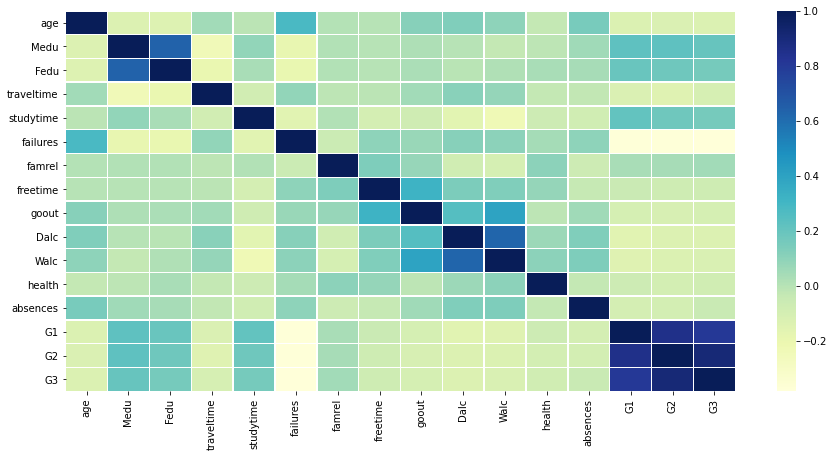

In [43]:
plt.figure(figsize=(15,7))
sns.heatmap(All_df.corr(),cmap='YlGnBu',linewidths=0.5)

#### Correlation Between Final Grade with all cols

In [45]:
All_df.corr()['G3'].sort_values()

failures     -0.383145
Dalc         -0.129642
age          -0.125282
Walc         -0.115740
traveltime   -0.102627
goout        -0.097877
health       -0.080079
freetime     -0.064890
absences     -0.045671
famrel        0.054461
Fedu          0.159796
studytime     0.161629
Medu          0.201472
G1            0.809142
G2            0.910743
G3            1.000000
Name: G3, dtype: float64

#### Convert All Columns to Binary Col [0 - 1] 

In [496]:
binary_cols=['school',
             'sex',
             'address',
             'famsize',
             'Pstatus',
             'schoolsup',
             'famsup',
             'paid',
             'activities',
             'nursery',
             'higher',
             'internet',
             'romantic'
]

#### Convert Binary_cols to 0 - 1 Using LabelEncoder

In [497]:
from sklearn.preprocessing import LabelEncoder
for i in binary_cols:
    All_df[i]=LabelEncoder().fit_transform(All_df[i])

All_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,18,1,0,0,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,0,0,17,1,0,1,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,0,0,15,1,1,1,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,0,0,15,1,0,1,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,0,0,16,1,0,1,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


#### Check if there are columns with dtype object

In [498]:
All_df.select_dtypes(include='object').columns

Index(['Mjob', 'Fjob', 'reason', 'guardian'], dtype='object')

In [499]:
All_df2=pd.get_dummies(All_df,columns=["Mjob",'Fjob','reason','guardian'])
All_df2

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
0,0,0,18,1,0,0,4,4,2,2,...,0,0,1,1,0,0,0,0,1,0
1,0,0,17,1,0,1,1,1,1,2,...,1,0,0,1,0,0,0,1,0,0
2,0,0,15,1,1,1,1,1,1,2,...,1,0,0,0,0,1,0,0,1,0
3,0,0,15,1,0,1,4,2,1,3,...,0,1,0,0,1,0,0,0,1,0
4,0,0,16,1,0,1,3,3,1,2,...,1,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,1,0,19,0,0,1,2,3,1,3,...,1,0,0,1,0,0,0,0,1,0
1040,1,0,18,1,1,1,3,1,1,2,...,0,1,0,1,0,0,0,0,1,0
1041,1,0,18,1,0,1,1,1,2,2,...,1,0,0,1,0,0,0,0,1,0
1042,1,1,17,1,1,1,3,1,2,1,...,0,1,0,1,0,0,0,0,1,0


In [500]:
All_df2.select_dtypes(include='object').columns

Index([], dtype='object')

#### All data is became binary and ready to analyze it 

<a id='eda'></a>
## Exploratory Data Analysis

In [91]:
import warnings
warnings.filterwarnings("ignore")

#### Summary Statistical Descriptive

In [80]:
All_df.describe()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,...,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000
mean,0.260536,0.433908,16.726054,0.727011,0.293103,0.884100,2.603448,2.387931,1.522989,1.970307,...,3.935824,3.201149,3.156130,1.494253,2.284483,3.543103,4.434866,11.213602,11.246169,11.341954
std,0.439138,0.495850,1.239975,0.445708,0.455404,0.320259,1.124907,1.099938,0.731727,0.834353,...,0.933401,1.031507,1.152575,0.911714,1.285105,1.424703,6.210017,2.983394,3.285071,3.864796
min,0.000000,0.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,16.000000,0.000000,0.000000,1.000000,2.000000,1.000000,1.000000,1.000000,...,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,9.000000,9.000000,10.000000
50%,0.000000,0.000000,17.000000,1.000000,0.000000,1.000000,3.000000,2.000000,1.000000,2.000000,...,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,11.000000
75%,1.000000,1.000000,18.000000,1.000000,1.000000,1.000000,4.000000,3.000000,2.000000,2.000000,...,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,1.000000,1.000000,22.000000,1.000000,1.000000,1.000000,4.000000,4.000000,4.000000,4.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


#### Statistical Analysis For All Cols in Data

In [121]:
school_count=All_df['school'].value_counts()
sex_count=All_df['sex'].value_counts()
address_count=All_df['address'].value_counts().sort_values(ascending=True)
famsize_count=All_df['famsize'].value_counts()

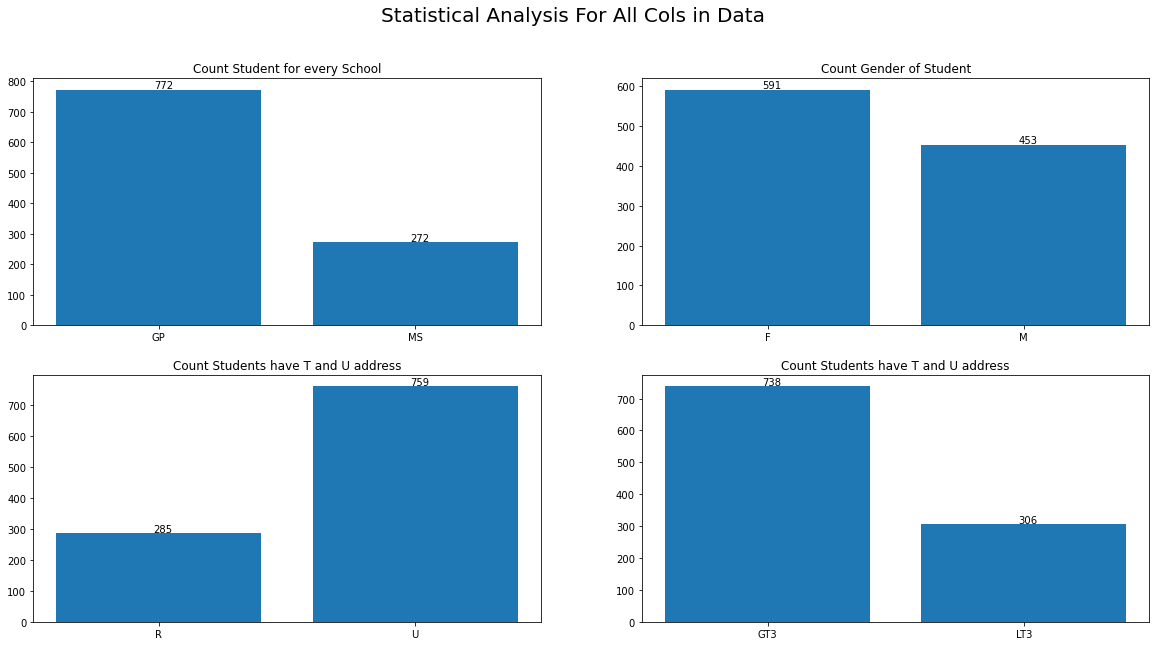

In [127]:
plt.figure(figsize=(20,10))
plt.suptitle("Statistical Analysis For All Cols in Data",size=20)

plt.subplot(2,2,1)
plt.title('Count Student for every School')
plt.bar(['GP','MS'],school_count)
for i in range(2):
    plt.text(i-0.02,school_count[i]+5,str(round(school_count[i])))
    
    
#########################################################################
plt.subplot(2,2,2)
plt.title('Count Gender of Student')
plt.bar(['F','M'],sex_count)
for i in range(2):
    plt.text(i-0.02,sex_count[i]+5,str(round(sex_count[i])))

    
#########################################################################
plt.subplot(2,2,3)
plt.title('Count Students have T and U address')
plt.bar(['R','U'],address_count)
for i in range(2):
    plt.text(i-0.02,address_count[i]+5,str(address_count[i]))
    
    
#########################################################################
plt.subplot(2,2,4)
plt.title('Count Students have T and U address')
plt.bar(['GT3','LT3'],famsize_count)
for i in range(2):
    plt.text(i-0.02,famsize_count[i]+5,str(famsize_count[i]))

    

plt.show()

In [168]:
Pstatus_count=All_df['Pstatus'].value_counts().sort_values(ascending=True)
Medu_count=All_df['Medu'].value_counts()
Fedu_count=All_df['Fedu'].value_counts()
traveltime_count=All_df['traveltime'].value_counts()

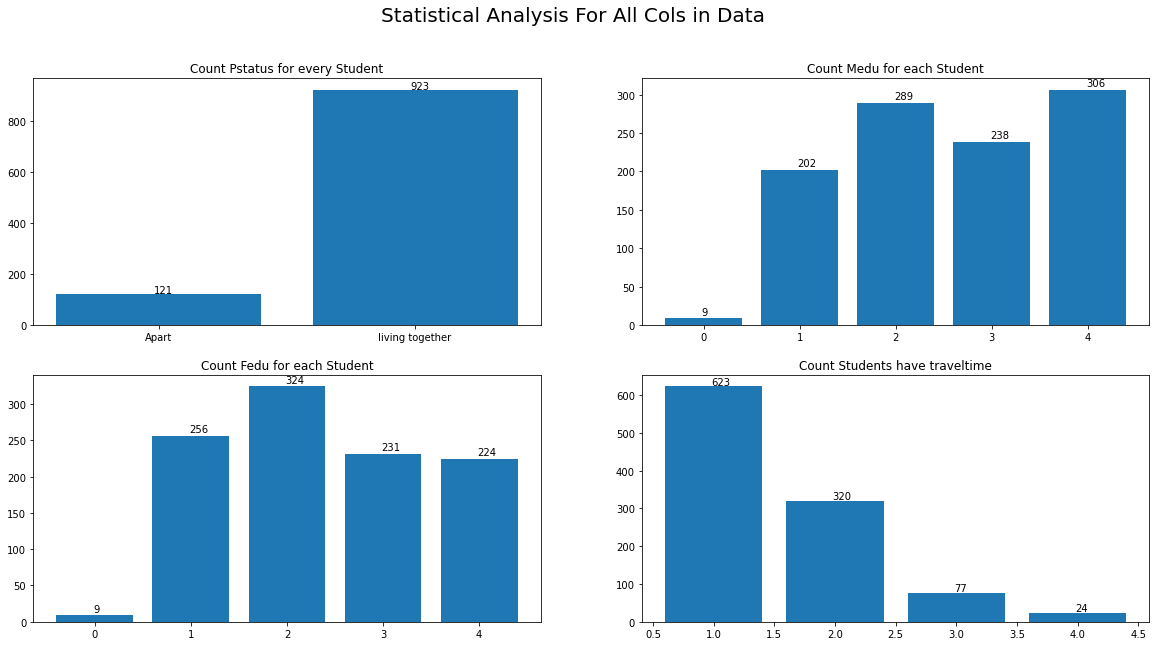

In [179]:
plt.figure(figsize=(20,10))
plt.suptitle("Statistical Analysis For All Cols in Data",size=20)

plt.subplot(2,2,1)
plt.title('Count Pstatus for every Student')
plt.bar(['Apart','living together'],Pstatus_count)
for i in range(2):
    plt.text(i-0.02,Pstatus_count[i]+5,str(Pstatus_count[i]))
    
    
#########################################################################
plt.subplot(2,2,2)
plt.title('Count Medu for each Student')
plt.bar(Medu_count.index,Medu_count)
for i in range(len(Fedu_count)):
    plt.text(i-0.02,Medu_count[i]+5,str(Medu_count[i]))
    

# numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education    
#########################################################################
plt.subplot(2,2,3)
plt.title('Count Fedu for each Student')
plt.bar(Fedu_count.index,Fedu_count)
for i in range(len(Fedu_count)):
    plt.text(i-0.02,Fedu_count[i]+5,str(Fedu_count[i]))
    
# numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education        
#########################################################################
plt.subplot(2,2,4)
plt.title('Count Students have traveltime')
plt.bar(traveltime_count.index,traveltime_count)
for i in range(1,5):
    plt.text(i-0.02,traveltime_count[i]+5,str(traveltime_count[i]))

    

plt.show()

<a id='split'></a>
# Split data into train and test sets for model

In [501]:
x=np.array(All_df2.drop(columns='G3'))
y=np.array(All_df2['G3'])

In [502]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor , DecisionTreeClassifier
from sklearn.svm import SVR ,SVC
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

In [503]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [504]:
print(f"Train set Size : {len(X_train)}")
print(f"Test set Size : {len(X_test)}")

Train set Size : 835
Test set Size : 209


<a id='model'></a>
# Train the Model

### Regression model

#### Grid Search to choose best paramerars

In [507]:
scorer=make_scorer(f1_score)
params={'max_depth':range(1,10)}
Clf2=GridSearchCV(DecisionTreeRegressor(),params)
grid_fit2=Clf2.fit(X_train,y_train)
grid_fit2.best_estimator_

DecisionTreeRegressor(max_depth=4)

In [506]:
scorer=make_scorer(accuracy_score)
params={'kernel':('linear','rbf'),
       'C':range(1,10)}
Clf=GridSearchCV(SVR(),params)
grid_fit=Clf.fit(X_train,y_train)
grid_fit.best_estimator_

SVR(C=9)

In [508]:
model1=DecisionTreeRegressor(max_depth=4)
model2=SVR(kernel='rbf',C=9)

In [509]:
model1.fit(X_train,y_train)
model2.fit(X_train,y_train)

SVR(C=9)

In [510]:
y_pred1=model1.predict(X_test)
y_pred2=model2.predict(X_test)

In [511]:
print(f"Accuracy Score for Model 1 through training set is {round(model1.score(X_train , y_train),2)*100}%")
print(f"Accuracy Score for Model 2 through training set is {round(model2.score(X_train , y_train),2)*100}%")


Accuracy Score for Model 1 through training set is 87.0%
Accuracy Score for Model 2 through training set is 86.0%


In [512]:
print(f"Accuracy Score for Model 1 through test set is {round(accuracy_score(y_test,np.round(y_pred1).astype(int)),2)*100}%")
print(f"Accuracy Score for Model 2 through test set is {round(accuracy_score(y_test,np.round(y_pred2).astype(int)),2)*100}%")

Accuracy Score for Model 1 through test set is 44.0%
Accuracy Score for Model 2 through test set is 38.0%


In [514]:
print(f"when best param C=9 with Decision Tree Regressor model Accuracy is {round(accuracy_score(y_test,np.round(y_pred1).astype(int)),2)*100}%")
print(f"when best param C=9 with SVR model Accuracy is {round(accuracy_score(y_test,np.round(y_pred2).astype(int)),2)*100}%")

when best param C=9 with Decision Tree Regressor model Accuracy is 44.0%
when best param C=9 with SVR model Accuracy is 38.0%


### Try Classification output

In [ ]:
#### G3 < 10 =>F , G3 < 12 =>D , G3 < 14 =>C , G3 < 16 =>B ,G3 > 16 =>A 

In [515]:
All_df2['class']=All_df2['G3'].map(lambda x:'F' if x<10 
                                   else( 'D' if x<12 
                                   else( 'C' if x<14 
                                   else( 'B' if x<16 else 'A'))))


In [516]:
class_count=All_df2['class'].value_counts()

In [517]:
All_df2.drop(columns='G3',inplace=True)

In [518]:
All_df2.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid',
       'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2',
       'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services',
       'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other',
       'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home',
       'reason_other', 'reason_reputation', 'guardian_father',
       'guardian_mother', 'guardian_other', 'class'],
      dtype='object')

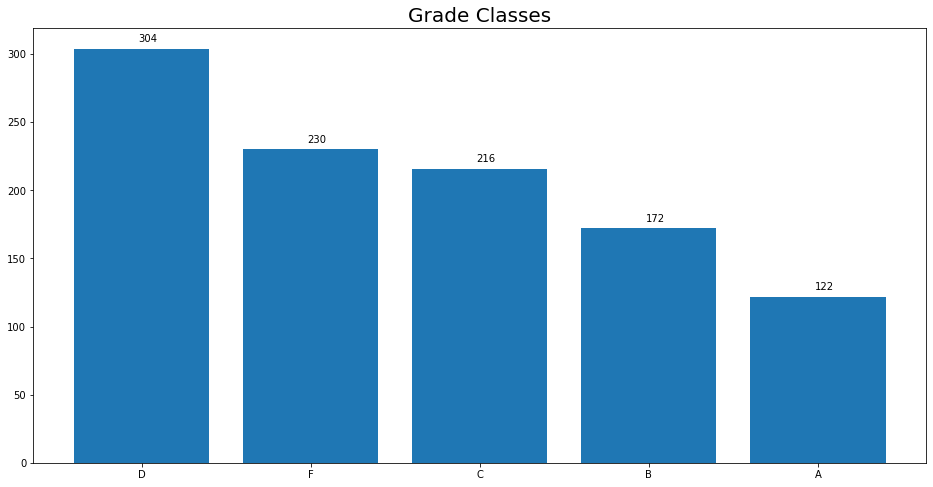

In [519]:
plt.figure(figsize=(16,8))
plt.title("Grade Classes",size=20)
plt.bar(class_count.index,class_count.values)
for i in range(len(class_count)):
    plt.text(i-0.02,class_count[i]+5,str(class_count[i]))

plt.show()

#### Split Data to classification

In [520]:
X1=np.array(All_df2.drop(columns='class'))
y1=np.array(All_df2['class'])

In [521]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y1,test_size=0.2)

In [522]:
print(f"Train set Size : {len(X1_train)}")
print(f"Test set Size : {len(X1_test)}")

Train set Size : 835
Test set Size : 209


### Train model

#### Grid Search to choose best paramerars

In [523]:
scorer=make_scorer(accuracy_score)
params={'kernel':('linear','rbf'),
       'C':range(1,10)}
Clf=GridSearchCV(SVC(),params)
grid_fit=Clf.fit(X1_train,y1_train)
grid_fit.best_estimator_

SVC(C=9)

In [524]:
scorer=make_scorer(accuracy_score)
params={'max_depth':range(1,10)}
Clf=GridSearchCV(DecisionTreeClassifier(),params)
grid_fit=Clf.fit(X1_train,y1_train)
grid_fit.best_estimator_

DecisionTreeClassifier(max_depth=3)

In [484]:
model3=SVC(kernel='rbf',C=9)
model4=DecisionTreeClassifier(max_depth=3)

In [525]:
model3.fit(X1_train,y1_train)
model4.fit(X1_train,y1_train)

DecisionTreeClassifier(max_depth=3)

In [526]:
y_pred3=model3.predict(X1_test)
y_pred4=model4.predict(X1_test)

In [527]:
print(f"Accuracy Score for Model 1 through training set is {round(model3.score(X1_train , y1_train),2)*100}%")
print(f"Accuracy Score for Model 2 through training set is {round(model4.score(X1_train , y1_train),2)*100}%")

Accuracy Score for Model 1 through training set is 82.0%
Accuracy Score for Model 2 through training set is 77.0%


In [528]:
print(f"test accuracy model3 SVC  is {round(accuracy_score(y1_test,y_pred3),2)*100}%")
print(f"test accuracy model4 DTC  is {round(accuracy_score(y1_test,y_pred4),2)*100}%")

test accuracy model3 SVC  is 71.0%
test accuracy model4 DTC  is 72.0%


### Test Predict Model 

In [532]:
print(f"Correct output for 10 rows in data :")
print(y1_test[0:10])
print("_"*50)
print(f"\nData is predict by Model SVC:")
y_pred_test=model3.predict(X1_test[0:10])
print(y_pred_test)

Correct output for 10 rows in data :
['C' 'F' 'A' 'F' 'A' 'F' 'C' 'D' 'F' 'B']
__________________________________________________

Data is predict by Model SVC:
['C' 'F' 'A' 'F' 'A' 'F' 'C' 'D' 'D' 'B']


In [534]:
print(f"Correct output for 10 rows in data :")

print(y1_test[0:10])
print("_"*50)
print(f"\nData is predict by Model DecisionTreeClassifier:")
y_pred_test=model4.predict(X1_test[0:10])
print(y_pred_test)

Correct output for 10 rows in data :
['C' 'F' 'A' 'F' 'A' 'F' 'C' 'D' 'F' 'B']
__________________________________________________

Data is predict by Model DecisionTreeClassifier:
['C' 'D' 'A' 'F' 'A' 'F' 'C' 'D' 'D' 'B']


<a id='con'> </a>
# Conclusions

- No `missing` data.
- No `duplicate` data
- `Marge` two files done
- Modify `data type` for all cols done
- define `correlation` between `G3` and all columns others done.
- `convert` columns to binary cols done
- applied `summary statistical descriptive` done
- `visualization` some main columns 
- split data to `train-set` and `test-set`
- check some model like `SVM`, `DecisionTree` as regression model to predict `G3`  
- check some model like `SVM`, `DecisionTree` as classification model to predict `G3` 
- This data works best in the case of classification rather than regression with `SVC` 
